<a href="https://colab.research.google.com/github/geekevgin/-Python/blob/main/HW_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages(c("lubridate", "tidyverse", "survival", "ggsurvfit", "gtsummary", "tidycmprsk"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(lubridate)
library(tidyverse)
library(survival)
library(ggsurvfit)
library(gtsummary)
library(tidycmprsk)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr   1.1.4     ✔ readr   2.1.5
✔ forcats 1.0.0     ✔ stringr 1.5.1
✔ ggplot2 3.5.1     ✔ tibble  3.2.1
✔ purrr   1.0.2     ✔ tidyr   1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘tidycmprsk’


The following object is masked from ‘package:gtsummary’:

    trial




In [5]:
install.packages("readr")
library(readr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
clinical_data <- readr::read_tsv("clinical.tsv")
head(clinical_data, 5)

New names:
• `residual_disease` -> `residual_disease...118`
• `residual_disease` -> `residual_disease...189`
Rows: 1745 Columns: 210
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (210): case_id, case_submitter_id, project_id, age_at_index, age_is_obfu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_birth,country_of_residence_at_enrollment,days_to_birth,⋯,treatment_dose_units,treatment_duration,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_outcome_duration,treatment_type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
00061f34-c891-4f9c-b8d6-3ca68b98c875,AD1348,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
0035b612-8955-4da5-a35d-bced5b32cbec,AD258,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
008147fd-3235-4bab-b816-7589590959d1,AD10836,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
00f67c2e-b77f-4082-907c-1dd4ea418f14,AD12672,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
01462f16-c767-40ee-8c81-d3927d308aa8,AD8272,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--


In [7]:
exposure_dataset <- readr::read_tsv("/content/exposure.tsv")
head(exposure_dataset, 5)

Rows: 401 Columns: 44
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (44): case_id, case_submitter_id, project_id, age_at_last_exposure, age_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


case_id,case_submitter_id,project_id,age_at_last_exposure,age_at_onset,alcohol_days_per_week,alcohol_drinks_per_day,alcohol_frequency,alcohol_history,alcohol_intensity,⋯,type_of_smoke_exposure,type_of_tobacco_used,use_per_day,years_smoked,bmi,height,marijuana_use_per_week,smokeless_tobacco_quit_age,tobacco_use_per_day,weight
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
01775b06-5836-469c-8537-120cb8cc94e9,TCGA-IB-7897,TCGA-PAAD,'--,'--,'--,'--,'--,Yes,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
01b7ac35-49e3-48db-a081-2971b807445f,C3N-02696,CPTAC-3,'--,'--,'--,'--,'--,Yes,Occasional Drinker,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
0251b915-6bf6-43a3-b3a3-aadbac0be13f,HCM-BROD-0204-C25,HCMI-CMDC,'--,'--,'--,'--,'--,'--,Unknown,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
0286c31b-a704-4d7d-99e3-0bc4e8975b8b,HCM-CSHL-0084-C25,HCMI-CMDC,'--,'--,'--,'--,'--,'--,Non-Drinker,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
02dbd5fa-e31f-4486-8df8-5b851f2e92bd,TCGA-HZ-8315,TCGA-PAAD,'--,'--,'--,'--,'--,Not Reported,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--


In [8]:
dataset <- left_join(clinical_data, exposure_dataset, by = 'case_id')

In [9]:
attributes(dataset)

$row.names
   [1]    1    2    3    4    5    6    7    8    9   10   11   12   13   14
  [15]   15   16   17   18   19   20   21   22   23   24   25   26   27   28
  [29]   29   30   31   32   33   34   35   36   37   38   39   40   41   42
  [43]   43   44   45   46   47   48   49   50   51   52   53   54   55   56
  [57]   57   58   59   60   61   62   63   64   65   66   67   68   69   70
  [71]   71   72   73   74   75   76   77   78   79   80   81   82   83   84
  [85]   85   86   87   88   89   90   91   92   93   94   95   96   97   98
  [99]   99  100  101  102  103  104  105  106  107  108  109  110  111  112
 [113]  113  114  115  116  117  118  119  120  121  122  123  124  125  126
 [127]  127  128  129  130  131  132  133  134  135  136  137  138  139  140
 [141]  141  142  143  144  145  146  147  148  149  150  151  152  153  154
 [155]  155  156  157  158  159  160  161  162  163  164  165  166  167  168
 [169]  169  170  171  172  173  174  175  176  177  178  179  18

In [10]:
data <- dataset %>% select(
    days_to_birth,
    days_to_death,
    days_to_best_overall_response,
    days_to_diagnosis,
    days_to_last_follow_up,
    days_to_last_known_disease_status,
    days_to_recurrence,
    treatment_duration,
    cause_of_death,
    gender,
    age_at_diagnosis,
    classification_of_tumor,
    metastasis_at_diagnosis,
    alcohol_days_per_week,
    cigarettes_per_day,

    vital_status
)

head(data, 5)

days_to_birth,days_to_death,days_to_best_overall_response,days_to_diagnosis,days_to_last_follow_up,days_to_last_known_disease_status,days_to_recurrence,treatment_duration,cause_of_death,gender,age_at_diagnosis,classification_of_tumor,metastasis_at_diagnosis,alcohol_days_per_week,cigarettes_per_day,vital_status
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
'--,'--,'--,'--,'--,'--,'--,'--,'--,female,23207,metastasis,'--,NA,NA,Not Reported
'--,'--,'--,'--,'--,'--,'--,'--,'--,male,23810,Unknown,'--,NA,NA,Not Reported
'--,'--,'--,'--,'--,'--,'--,'--,'--,female,23617,metastasis,'--,NA,NA,Not Reported
'--,'--,'--,'--,'--,'--,'--,'--,'--,female,19101,primary,'--,NA,NA,Not Reported
'--,'--,'--,'--,'--,'--,'--,'--,'--,female,18206,metastasis,'--,NA,NA,Not Reported


In [11]:
data <- transform(
    data,
    days_to_birth = as.numeric(days_to_birth),
    days_to_death = as.numeric(days_to_death),
    days_to_best_overall_response = as.numeric(days_to_best_overall_response),
    days_to_diagnosis = as.numeric(days_to_diagnosis),
    days_to_last_follow_up = as.numeric(days_to_last_follow_up),
    days_to_last_known_disease_status = as.numeric(days_to_last_known_disease_status),
    days_to_recurrence = as.numeric(days_to_recurrence),
    cigarettes_per_day = as.numeric(cigarettes_per_day)

)
head(data, 10)

Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
“NAs introduced by coercion”


,days_to_birth,days_to_death,days_to_best_overall_response,days_to_diagnosis,days_to_last_follow_up,days_to_last_known_disease_status,days_to_recurrence,treatment_duration,cause_of_death,gender,age_at_diagnosis,classification_of_tumor,metastasis_at_diagnosis,alcohol_days_per_week,cigarettes_per_day,vital_status
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,NA,NA,NA,NA,NA,NA,NA,'--,'--,female,23207,metastasis,'--,NA,NA,Not Reported
2,NA,NA,NA,NA,NA,NA,NA,'--,'--,male,23810,Unknown,'--,NA,NA,Not Reported
3,NA,NA,NA,NA,NA,NA,NA,'--,'--,female,23617,metastasis,'--,NA,NA,Not Reported
4,NA,NA,NA,NA,NA,NA,NA,'--,'--,female,19101,primary,'--,NA,NA,Not Reported
5,NA,NA,NA,NA,NA,NA,NA,'--,'--,female,18206,metastasis,'--,NA,NA,Not Reported
6,NA,NA,NA,NA,NA,NA,NA,'--,'--,female,22889,metastasis,'--,NA,NA,Not Reported
7,-19718,486,NA,0,NA,NA,NA,'--,'--,female,19718,not reported,'--,'--,NA,Dead
8,-19718,486,NA,0,NA,NA,NA,'--,'--,female,19718,not reported,'--,'--,NA,Dead
9,NA,NA,NA,NA,NA,NA,NA,'--,'--,male,13248,metastasis,'--,NA,NA,Not Reported


In [12]:
data <- filter(data, days_to_death != "NA", cigarettes_per_day != "NA")





In [13]:



data <-
  data %>%
  as_tibble() %>%
  mutate(status = recode(vital_status, `Dead` = 1, default = 0))
data$time <- data$days_to_death
data$cigarretes <- data$cigarettes_per_day



data_df <- data %>% select(time, status,cigarretes,gender)

data_df %>%
  tbl_summary(statistic = status ~ "{n} / {N}") %>%
  add_stat_label()

<div id="vrgpmutmvl" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
  <style>#vrgpmutmvl table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#vrgpmutmvl thead, #vrgpmutmvl tbody, #vrgpmutmvl tfoot, #vrgpmutmvl tr, #vrgpmutmvl td, #vrgpmutmvl th {
  border-style: none;
}

#vrgpmutmvl p {
  margin: 0;
  padding: 0;
}

#vrgpmutmvl .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  b

In [14]:
head(data_df, 10)

time,status,cigarretes,gender
<dbl>,<dbl>,<dbl>,<chr>
403,1,5.0000000,female
695,1,0.2547945,female
695,1,0.2547945,female
815,1,20.0000000,male
398,1,15.0000000,male
394,1,1.6438356,female
394,1,1.6438356,female
1142,1,20.0000000,female
652,1,1.6438356,male


In [15]:
s1 <- survfit(Surv(time, status) ~ 1, data = data_df)
str(s1)

List of 17
 $ n        : int 88
 $ time     : num [1:58] 39 41 66 68 110 118 123 143 179 183 ...
 $ n.risk   : num [1:58] 88 87 85 83 82 80 79 77 75 73 ...
 $ n.event  : num [1:58] 1 2 2 1 2 1 2 2 2 2 ...
 $ n.censor : num [1:58] 0 0 0 0 0 0 0 0 0 0 ...
 $ surv     : num [1:58] 0.989 0.966 0.943 0.932 0.909 ...
 $ std.err  : num [1:58] 0.0114 0.02 0.0262 0.0288 0.0337 ...
 $ cumhaz   : num [1:58] 0.0114 0.0344 0.0579 0.0699 0.0943 ...
 $ std.chaz : num [1:58] 0.0114 0.0198 0.0259 0.0286 0.0334 ...
 $ type     : chr "right"
 $ logse    : logi TRUE
 $ conf.int : num 0.95
 $ conf.type: chr "log"
 $ lower    : num [1:58] 0.967 0.929 0.896 0.881 0.851 ...
 $ upper    : num [1:58] 1 1 0.993 0.986 0.971 ...
 $ t0       : num 0
 $ call     : language survfit(formula = Surv(time, status) ~ 1, data = data_df)
 - attr(*, "class")= chr "survfit"


Call: survfit(formula = Surv(time, status) ~ 1, data = data_df)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  365     62      26    0.705  0.0486        0.615        0.807

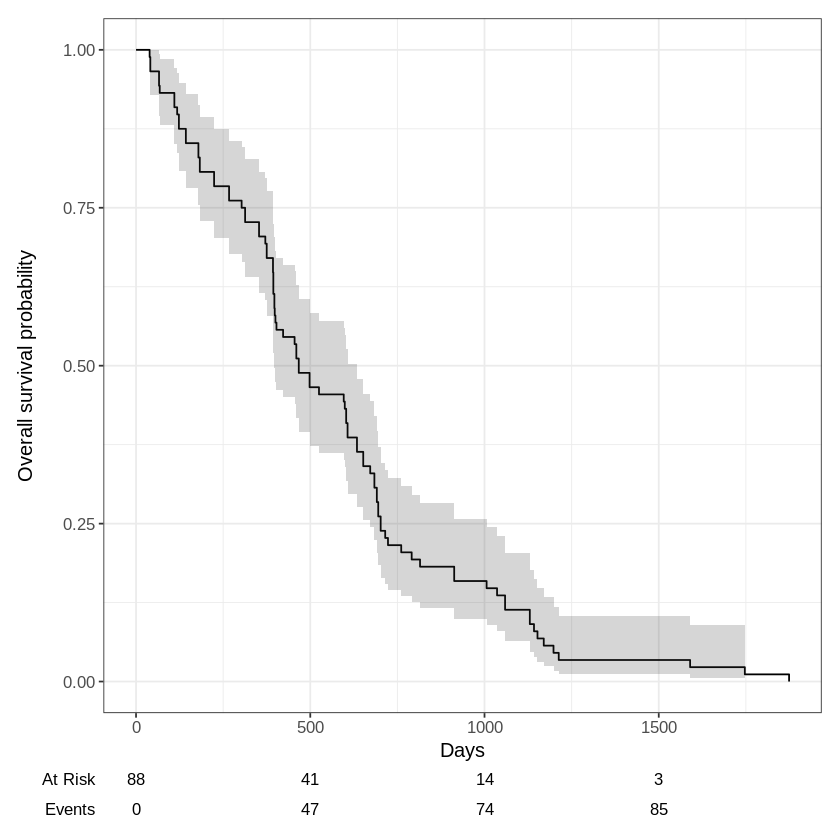

<div id="opsodouvjv" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
  <style>#opsodouvjv table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#opsodouvjv thead, #opsodouvjv tbody, #opsodouvjv tfoot, #opsodouvjv tr, #opsodouvjv td, #opsodouvjv th {
  border-style: none;
}

#opsodouvjv p {
  margin: 0;
  padding: 0;
}

#opsodouvjv .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  b

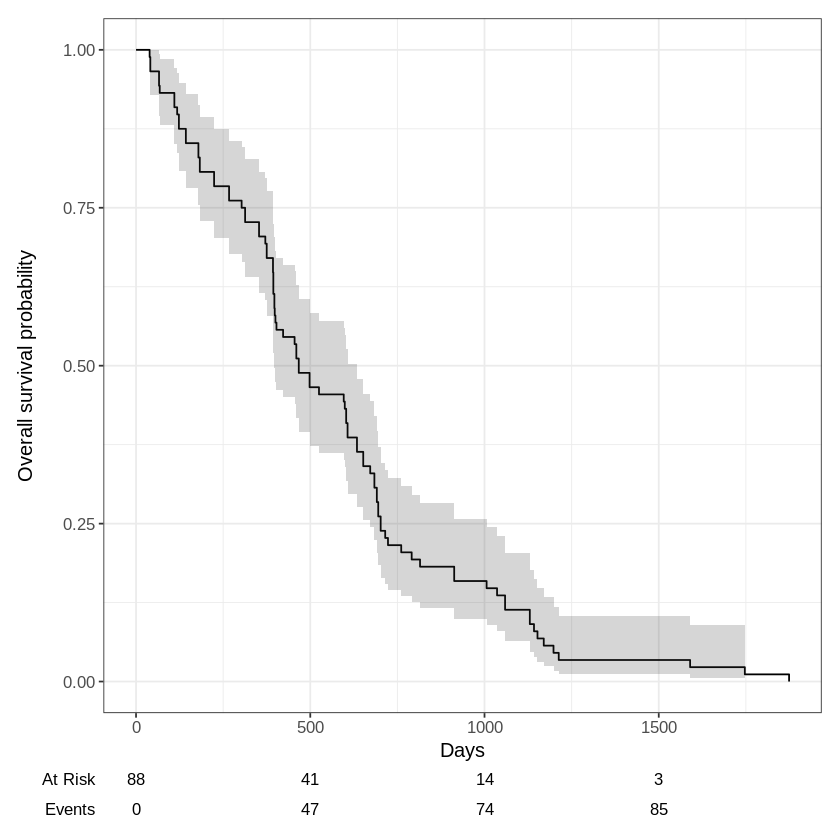

ERROR: Error in eval(expr, envir, enclos): object 'dates_data_df' not found


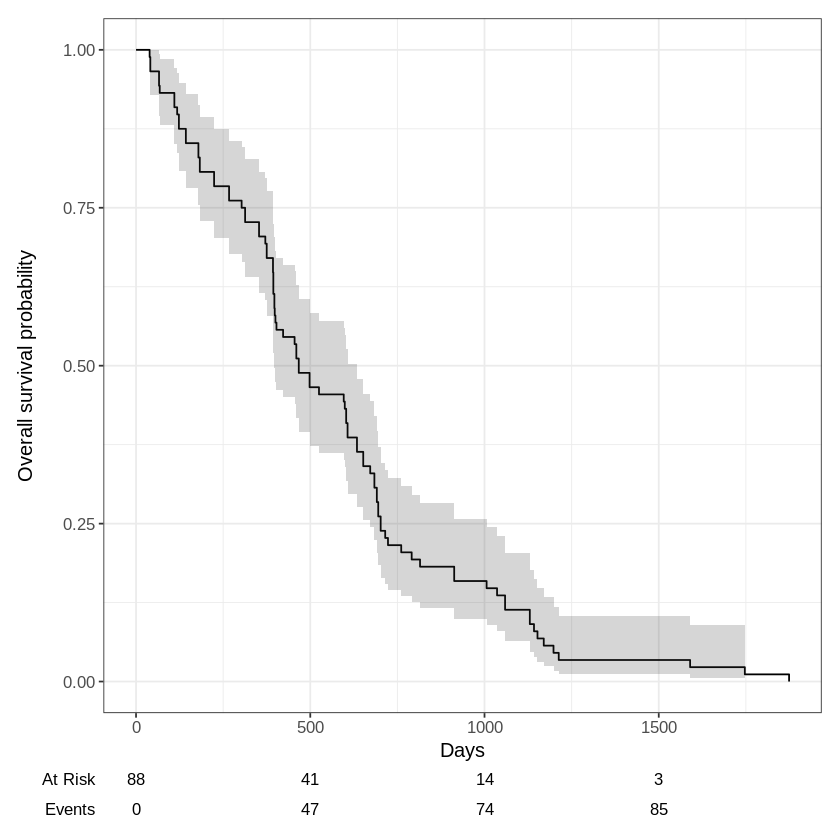

In [17]:
# Kaplan-Meier plots ------------------------------------------------------
survfit2(Surv(time, status) ~ 1, data = data_df) %>%
  ggsurvfit() +
  labs(
    x = "Days",
    y = "Overall survival probability"
  ) +
  add_confidence_interval() +
  add_risktable()

# estimate x-year survival
summary(s1, times = 365.25)

s1 %>%
  ggsurvfit() +
  labs(
    x = "Days",
    y = "Overall survival probability"
  ) +
  add_confidence_interval() +
  add_risktable()

s1 %>%
  tbl_survfit(
    times = 365.25,
    label_header = "**1-year survival (95% CI)**")

# median survival time
s1 %>%
  ggsurvfit() +
  labs(
    x = "Days",
    y = "Overall survival probability"
  ) +
  add_confidence_interval() +
  add_risktable()

dates_data_df %>%
  filter(status == 1) %>%
  summarize(median_surv = median(time))

s1 %>%
  tbl_survfit(
    probs = 0.5,
    label_header = "**Median survival (95% CI)**")

In [18]:



s2 <- survfit(Surv(time, status) ~ 0, data = data_df)
str(s2)

List of 17
 $ n        : int 88
 $ time     : num [1:58] 39 41 66 68 110 118 123 143 179 183 ...
 $ n.risk   : num [1:58] 88 87 85 83 82 80 79 77 75 73 ...
 $ n.event  : num [1:58] 1 2 2 1 2 1 2 2 2 2 ...
 $ n.censor : num [1:58] 0 0 0 0 0 0 0 0 0 0 ...
 $ surv     : num [1:58] 0.989 0.966 0.943 0.932 0.909 ...
 $ std.err  : num [1:58] 0.0114 0.02 0.0262 0.0288 0.0337 ...
 $ cumhaz   : num [1:58] 0.0114 0.0344 0.0579 0.0699 0.0943 ...
 $ std.chaz : num [1:58] 0.0114 0.0198 0.0259 0.0286 0.0334 ...
 $ type     : chr "right"
 $ logse    : logi TRUE
 $ conf.int : num 0.95
 $ conf.type: chr "log"
 $ lower    : num [1:58] 0.967 0.929 0.896 0.881 0.851 ...
 $ upper    : num [1:58] 1 1 0.993 0.986 0.971 ...
 $ t0       : num 0
 $ call     : language survfit(formula = Surv(time, status) ~ 0, data = data_df)
 - attr(*, "class")= chr "survfit"


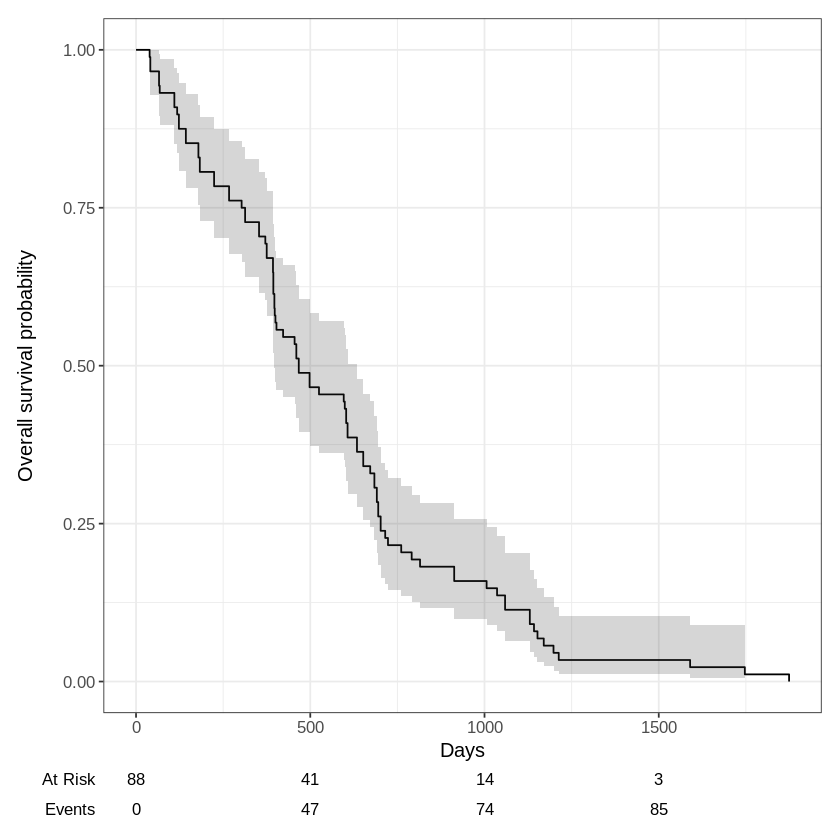

In [ ]:
survfit2(Surv(time, status) ~ 0, data = dates_data_df) %>%
  ggsurvfit() +
  labs(
    x = "Days",
    y = "Overall survival probability"
  ) +
  add_confidence_interval() +

  add_risktable()


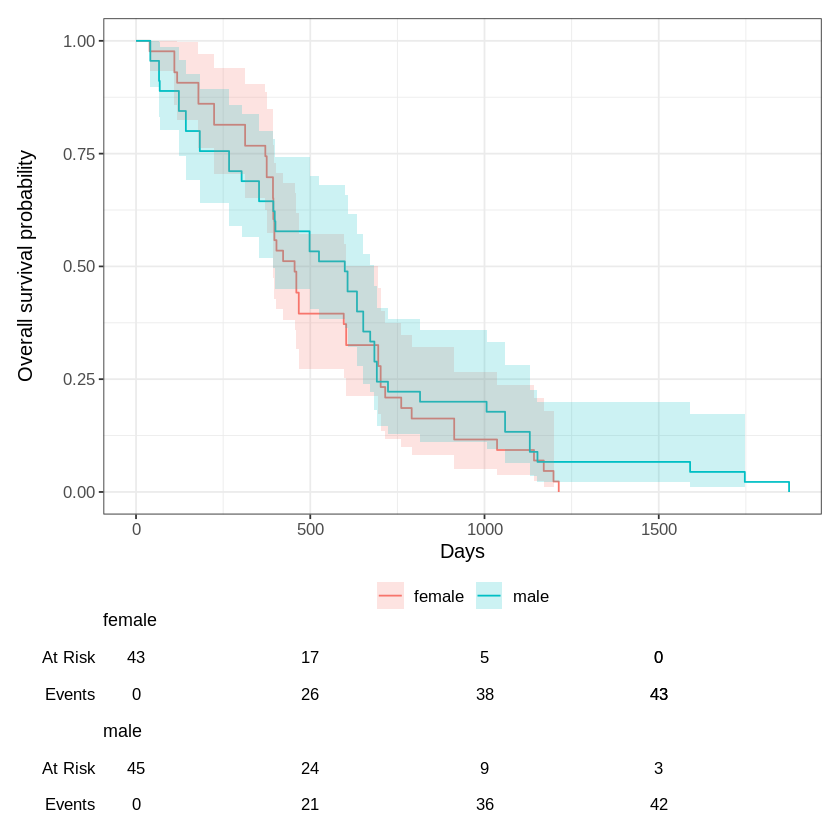

In [19]:
survfit2(Surv(time, status) ~ gender, data = data_df) %>%
  ggsurvfit() +
  labs(
    x = "Days",
    y = "Overall survival probability"
  ) +
  add_confidence_interval() +

  add_risktable()

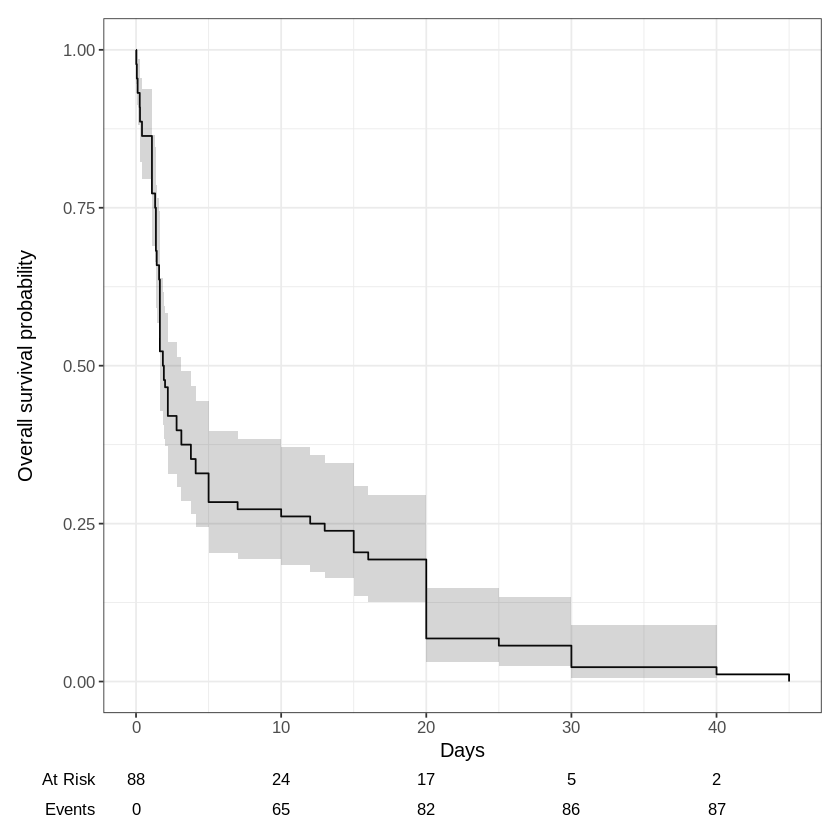

In [22]:
survfit2(Surv(cigarretes, status) ~ 0, data = data_df) %>%
  ggsurvfit() +
  labs(
    x = "Days",
    y = "Overall survival probability"
  ) +
  add_confidence_interval() +

  add_risktable()


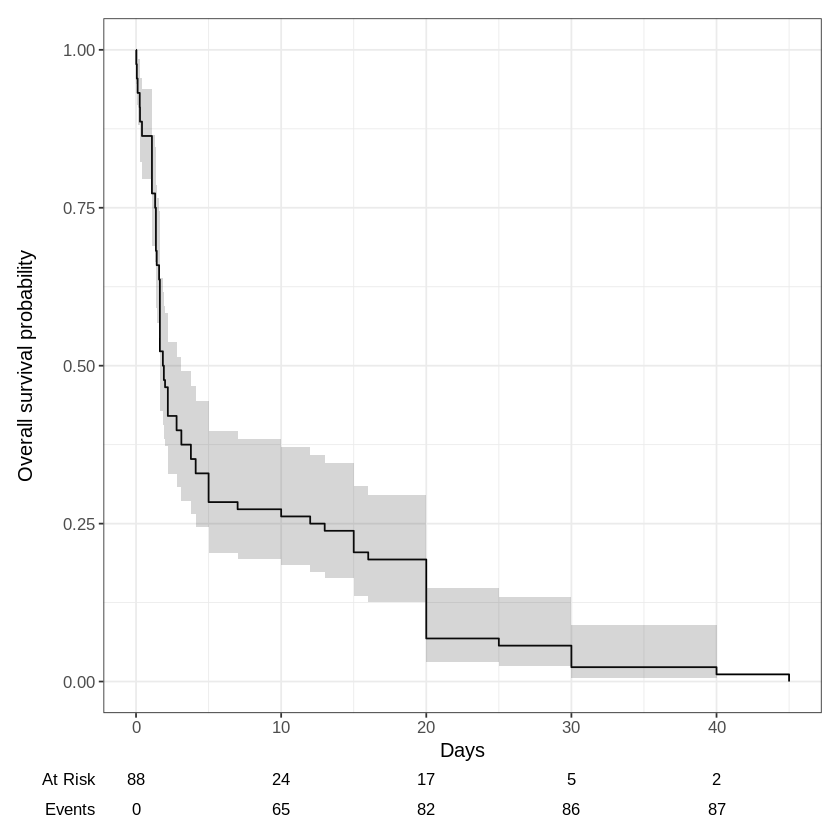

In [23]:
survfit2(Surv(cigarretes, status) ~ 1, data = data_df) %>%
  ggsurvfit() +
  labs(
    x = "Days",
    y = "Overall survival probability"
  ) +
  add_confidence_interval() +

  add_risktable()
